In [1]:
from vnstock import *
from function import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


##### VN100

In [1]:
import requests

url = "https://www.hsx.vn/Modules/Listed/Web/StockIndex/188803177?_search=false&nd=1676169121809&rows=2147483647&page=1&sidx=id&sord=desc"

payload={}
headers = {
  'Accept': 'application/json, text/javascript, */*; q=0.01',
  'Accept-Language': 'en-US,en;q=0.9',
  'Connection': 'keep-alive',
  'Cookie': 'ASP.NET_SessionId=pv5aylwinwlvuoxvulhw1520; TS016df111=01343ddb6a732d11705aa16e6e99545c4235ff00bd07f7414bbc3a74d35868c1b58d4d36d60f85294e5c2c0db6f52781f5f778f0760b8aa544f0c272e536799b269ccfe30c; TS0d710d04027=085cef26a9ab2000b2c8a3c680e48f06c29eb8c9070f02b7a50cb2e04312e353b8eb7c255dd5353608174c63a611300074005a71c9eb2a42d1ac3507bed71e1a6aa3bb449c5f75e1e51cbffcd3da2a4a7903957b541b1a138abd510fc6f9d8f6; TS0d710d04027=085cef26a9ab20006d24140c1a5e12ef3aaf09d94d0ad3fef504082ec7d0bafa3060dd87135e6e1208289d1fd7113000e733bb8f855b5e33367dc2862e425f27981f58be49c7f724ac2bd6205b1f6297d9223c5766bbd7a41a3b7008f8647f21',
  'Referer': 'https://www.hsx.vn/Modules/Listed/Web/StockIndexView/188803177',
  'Sec-Fetch-Dest': 'empty',
  'Sec-Fetch-Mode': 'cors',
  'Sec-Fetch-Site': 'same-origin',
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36 Edg/110.0.1587.41',
  'X-KL-Ajax-Request': 'Ajax_Request',
  'X-Requested-With': 'XMLHttpRequest',
  'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Microsoft Edge";v="110"',
  'sec-ch-ua-mobile': '?0',
  'sec-ch-ua-platform': '"Windows"'
}

response = requests.request("GET", url, headers=headers, data=payload)
a = response.json()
ticket=[]
# VN 100
for i in range(100):
    ticket.append(a["rows"][i]["cell"][2][:3])

##### VN30

In [2]:
ticket = ['CII','CTD','CTG','DHG','DPM','EIB','FPT','GAS','GMD','HDB','HPG','MBB','MSN','MWG','NVL','PNJ','REE','ROS','SAB','SBT','SSI','STB','TCB','VCB','VHM','VIC','VJC','VNM','VPB','VRE']

frame = []
for i in ticket:
    a = stock_historical_data(symbol=i, 
                            start_date="2013-01-01", 
                            end_date='2023-02-11')    
    a["ticker"] = i
    frame.append(a)
    
q = pd.concat(frame)
close= q.pivot_table(values="Close", columns="ticker", index="TradingDate")
high= q.pivot_table(values="High", columns="ticker", index="TradingDate")
low= q.pivot_table(values="Low", columns="ticker", index="TradingDate")
open= q.pivot_table(values="Open", columns="ticker", index="TradingDate")


### Markowitz model

In [5]:
w = marko_weights(close)
returns=close.pct_change()

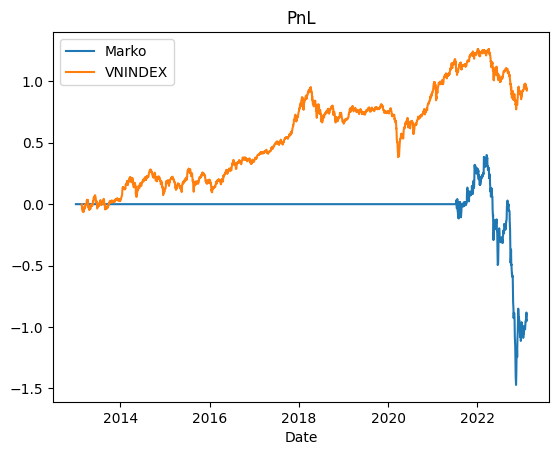

In [6]:
a = Simresult(w,returns=returns)
a.plot_pnl("Marko")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [3]:
close_t5=close-close.shift(5)

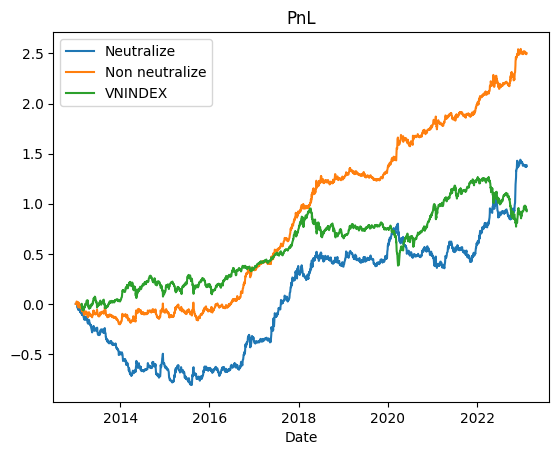

In [4]:
returns = close.pct_change()
w  = weights(close_t5, neutrali=1)
neu=Simresult(weights=w,returns=returns)
neu.plot_pnl(type="Neutralize")

w1  = weights(close_t5, neutrali=0)
non_neu=Simresult(weights=w1,returns=returns)
non_neu.plot_pnl(type="Non neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [59]:
neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.116131,1.026037,0.581226,0.458632,199.803249


In [60]:
neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.289115,-2.886706,0.628499,-1.957878,-460.008984
2014,-0.027787,-0.257894,0.603191,-0.055352,-46.065815
2015,0.025631,0.238350,0.585701,0.049861,43.760729
2016,0.372940,3.047322,0.581179,2.441085,641.695733
2017,0.467491,3.511050,0.542485,3.259341,861.758345
2018,0.032162,0.279907,0.577621,0.066049,55.680814
2019,0.094289,1.042111,0.622486,0.405582,151.471136
2020,-0.009300,-0.083557,0.577321,-0.010605,-16.109737
2021,0.139454,1.403362,0.563189,0.698326,247.614661


In [61]:
non_neu.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.250125,1.453026,0.594381,0.942582,420.81521


In [62]:
non_neu.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.201883,-1.312268,0.633236,-0.740952,-318.811946
2014,0.116070,0.680709,0.611300,0.296616,189.873894
2015,0.022471,0.146641,0.596954,0.028451,37.643256
2016,0.403735,2.814558,0.548013,2.415812,736.725821
2017,0.581298,4.198096,0.518273,4.446033,1121.606869
2018,0.329990,1.630178,0.582216,1.227280,566.783493
2019,0.124867,1.159499,0.625107,0.518224,199.753455
2020,0.420794,2.003896,0.587899,1.695347,715.758765
2021,0.210838,1.288363,0.609508,0.757745,345.914824


### alpha = rank(ts_delta(close,5))

In [22]:
close_t5=-close+close.shift(2)
alpha2 = (close_t5.rank(axis=1,ascending=True))
w =weights(alpha2)
w1 =weights(alpha2,neutrali=1)

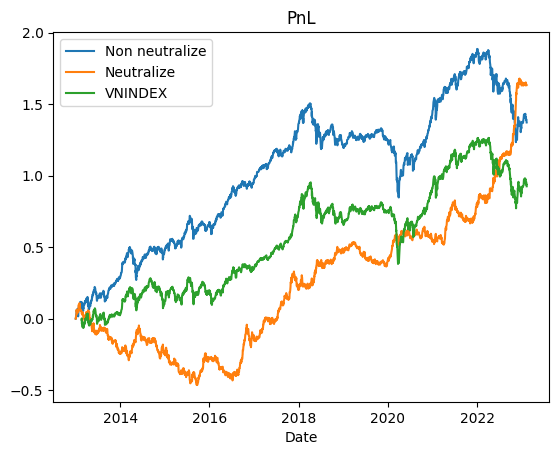

In [23]:
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(-1*w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [24]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.295813,1.863560,0.442000,1.524548,669.260863
2014,0.189230,1.089782,0.444286,0.711220,425.920799
2015,0.194029,1.279490,0.432988,0.856511,448.117235
2016,0.304565,2.208382,0.433552,1.850943,702.486088
2017,0.390224,3.321541,0.413294,3.227507,944.181106
2018,-0.146278,-0.621964,0.414540,-0.369464,-352.868450
2019,0.034053,0.303278,0.429333,0.085413,79.317126
2020,0.204233,0.839985,0.436440,0.574609,467.952823
2021,0.436084,2.008075,0.437789,2.004161,996.104954


In [25]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.247416,-1.561765,1.874576,-0.567385,-131.984908
2014,-0.002183,-0.013973,1.879659,-0.000476,-1.161588
2015,-0.029522,-0.178190,1.824702,-0.022665,-16.178968
2016,0.124704,0.761890,1.823831,0.199224,68.374950
2017,0.355876,2.265079,1.720907,1.030039,206.795428
2018,0.265421,1.616477,1.715923,0.635753,154.681451
2019,-0.053947,-0.507211,1.775882,-0.088402,-30.377396
2020,0.136237,0.944646,1.805297,0.259503,75.464907
2021,0.235711,1.350849,1.810197,0.487454,130.212774


### alpha = rank(ts_stddev(close,20)/(ts_sum(close,20)/20))

In [26]:
alpha3 = close.rolling(20).std()/close.rolling(20).mean()
alpha3 = alpha3.rank(ascending=True,axis=1)

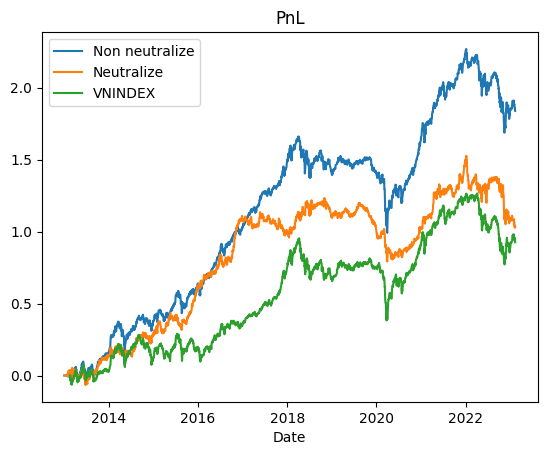

In [27]:
w =weights(alpha3, neutrali=0)
w1 =weights(alpha3,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [28]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.159390,0.962246,0.066895,1.485319,2382.688265
2014,0.219267,1.155682,0.072026,2.016412,3044.260053
2015,0.266818,1.616758,0.077119,3.007264,3459.814805
2016,0.400385,2.602420,0.076353,5.959399,5243.849852
2017,0.448664,3.693097,0.074534,9.060961,6019.591292
2018,-0.063020,-0.247593,0.087089,-0.210618,-723.629022
2019,-0.004045,-0.035525,0.089858,-0.007537,-45.016800
2020,0.243070,0.926794,0.073255,1.688225,3318.137737
2021,0.605009,2.626713,0.080396,7.205717,7525.392959


### alpha = close-ts_min(low,14))/(ts_max(high,14)-ts_min(low,14))*100

In [29]:
alpha4 = (close-low.rolling(14).min())/(high.rolling(14).max()-low.rolling(14).min())*100
alpha4 = alpha4.rank(axis=1,ascending=True)

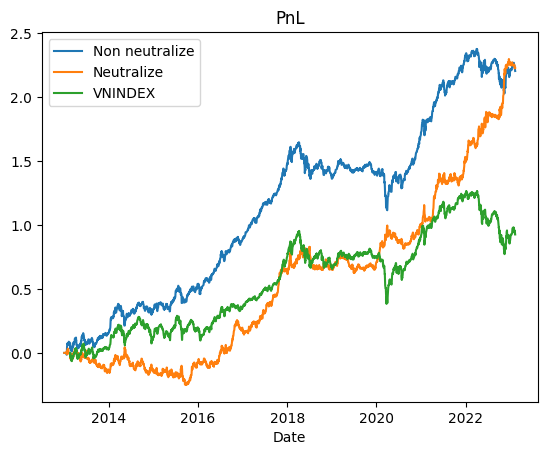

In [30]:
w =weights(alpha4, neutrali=0)
w1 =weights(alpha4,neutrali=1)

a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [31]:
a.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,0.157931,1.065741,0.248705,0.849264,635.012518
2014,0.181835,1.083061,0.279163,0.874103,651.358117
2015,0.204554,1.343846,0.264122,1.182639,774.470754
2016,0.355064,2.525390,0.256273,2.972558,1385.491202
2017,0.584456,5.236343,0.247106,8.053081,2365.200352
2018,-0.089944,-0.394881,0.268120,-0.228712,-335.461613
2019,0.035229,0.340195,0.257583,0.125811,136.766563
2020,0.308277,1.359877,0.275286,1.439057,1119.841978
2021,0.614284,2.913980,0.258452,4.492431,2376.783623


In [32]:
b.get_summary()

,Return,Sharpe,Turnover,Fitness,Margin
TradingDate,,,,,
2013,-0.141780,-0.996907,1.044611,-0.367269,-135.724768
2014,-0.006427,-0.039956,1.172545,-0.002958,-5.481126
2015,0.075996,0.484489,1.109311,0.126810,68.507822
2016,0.249075,1.626003,1.075296,0.782568,231.633538
2017,0.470580,3.100303,1.028544,2.097054,457.520963
2018,0.008614,0.042158,1.109199,0.003715,7.765854
2019,0.058572,0.523171,1.064676,0.122710,55.014139
2020,0.294539,1.636200,1.138369,0.832275,258.738056
2021,0.490544,2.382458,1.071964,1.611662,457.612185


### close-ts_product(close,5)^0.2

In [3]:
alpha5 = close-np.sqrt(close.rolling(2).apply(np.prod))
alpha5=alpha5.rank(axis=1,ascending=True)

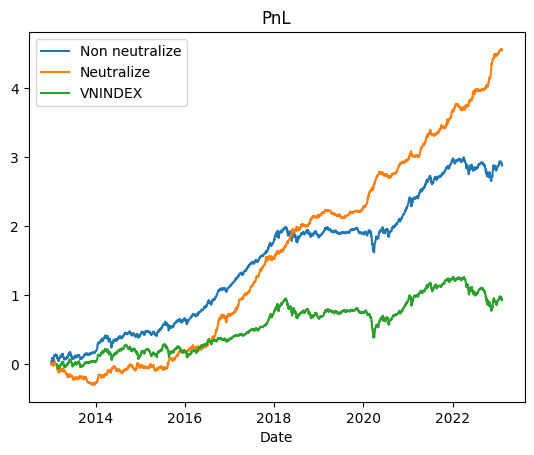

In [4]:
w =weights(alpha5, neutrali=0)
w1 =weights(alpha5,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [10]:
b.get_summary().to_csv("weights.txt",mode="a")

In [6]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.287557,1.572742,0.603881,1.085285,476.18172


In [7]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.454496,2.790966,2.526828,1.183673,179.868314


### alpha6
a = ts_sum(open>close,20)/ts_sum(open<close,20);

b = ts_sum(open>close,250)/ts_sum(open<close,250);

rank(a/b)

In [59]:
a=(1*(open>close).rolling(20).sum())/(1*(open<close).rolling(20).sum())
b=(1*(open>close).rolling(250).sum())/(1*(open<close).rolling(250).sum())
alpha6=(a/b).rank(ascending=True,axis=1)

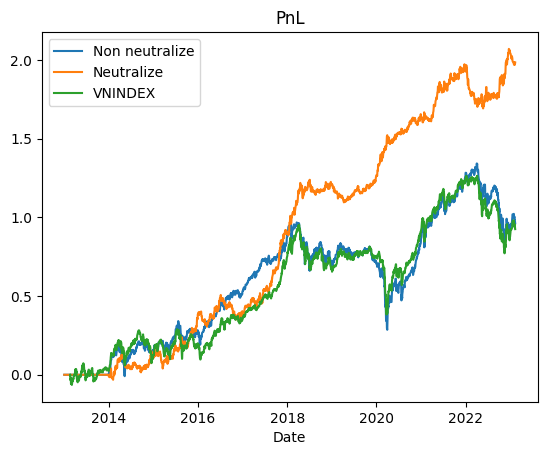

In [60]:
w =weights(alpha6, neutrali=0)
w1 =-1*weights(alpha6,neutrali=1)

returns = close.pct_change()
a = Simresult(w,returns)
a.plot_pnl("Non neutralize")

b = Simresult(w1,returns)
b.plot_pnl("Neutralize")

m=get_index_series(index_code='VNINDEX', time_range='TenYears')
m["i"]=pd.to_datetime(m["tradingDate"])
plt.plot(m["i"],np.cumsum(m["indexValue"].pct_change()), label="VNINDEX")
plt.legend()

In [62]:
np.maximum(b.get_turnover(),0.125)

TradingDate
2013    0.125000
2014    0.539801
2015    0.545161
2016    0.558181
2017    0.559296
2018    0.524079
2019    0.546418
2020    0.564021
2021    0.595023
2022    0.565551
2023    0.543651
dtype: float64

In [16]:
b.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.198489,1.362332,0.503744,0.855158,394.027975


In [17]:
a.get_overall()

,Return,Sharpe,Turnover,Fitness,Margin
0,0.096246,0.526361,0.121195,0.469064,794.141065


In [41]:
w1.iloc[-1,:].sort_values(ascending=False)

ticker
VCB    0.133333
DHG    0.123810
HPG    0.114286
HDB    0.104762
GMD    0.095238
CTG    0.085714
CTD    0.076190
STB    0.066667
SBT    0.057143
VHM    0.047619
SSI    0.038095
MWG    0.028571
TCB    0.019048
VNM    0.009524
DPM   -0.000000
VIC   -0.009524
CII   -0.019048
MBB   -0.028571
PNJ   -0.038095
VPB   -0.047619
GAS   -0.057143
VRE   -0.066667
FPT   -0.076190
SAB   -0.085714
VJC   -0.095238
MSN   -0.104762
NVL   -0.114286
EIB   -0.123810
REE   -0.133333
ROS         NaN
Name: 2023-02-10 00:00:00, dtype: float64